#  Making Requests and Filtering Data in Python

- In the previous exercise we explored the BayernAtlas website and experienced the data services and interactions behind the web interface by using Web Developer Tool.
- In this exercise, you will learn how to access similar data sources (web services) and manage the data using some simple Python codes.
- However, before starting this exercise you need to know more about the datasets and how to access it.

## Step 1) Visit [BayernAtlas](https://geoportal.bayern.de/bayernatlas) website

- [ ] Open the "web developer tool" by pressing Ctrl+Shift+C (or Ctrl+Shift+I) or by finding the tool in the browser menu.
- [ ] Select a background map at any specific location on the map.
- [ ] Check the URL of a raster image taken as a base map from the BayernAtlas website.
- [ ] Copy the URL and try requesting this image by pasting the URL into the address bar.
  - [ ] or you can test the URL using the "curl" program at the command prompt (CMD / Eingabeaufforderung).
![BayernAtlas Basemap Request Sample](images/exr2/bayernatlas_wmts_image.png)

## Step 2) Make a request with Python and "Requests" library

- [ ] Start a text editor (Notepad, Notepad++, SublimeText) or an IDE (Idle, Spyder, PyCharm)
- [ ] Write the following code in the editor and save it as a file with .PY extension.
  - Tip: Enable file extensions in Windows Explorer to view all file extensions.
    - [how to enable file extensions (in english)](https://fileinfo.com/help/windows_10_show_file_extensions)
    - [how to enable file extensions (in german)](https://www.giga.de/tipp/windows-10-und-11-dateiendungen-anzeigen-so-gehts/#windows_10_dateiendungen_einblenden)
- [ ] Open command prompt (Eingabeaufforderung) and navigate to the same folder as your python file. Execute the file by typing ```python MY_PYTHON_CODE.py``` (or type in ```python3 MY_PYTHON_CODE.py``` in Linux systems)
  - [ ] Try running python within **interactive** mode by typing ```python --interactive MY_PYTHON_CODE.py```.

In [4]:
#CHECKPOINT 1

# Import the native "requests" library to send a request to the web source.
import requests

# Replace the URL in the follwoing code with your selected URL
mydata = requests.get("https://intergeo33.bayernwolke.de/betty/c_hist/13/4197/4598")

#Check what the "mydata" object.
print(mydata)

<Response [200]>


|  |  |
|---|---|
| **Variable Name** | mydata |
| **Data Type** | requests.models.Response |

### 2a) What is happened?

- ```import requests``` imported the library named "requests". This library is a simple HTTP library supports all the methods available in the HTTP protocol such as GET, POST, DELETE etc.
- ```mydata =``` defines a variable and assigns it to the following object.
- ```requests.get()``` calls a method in the requests library.

> When a class (e.g. requests) contains functions (e.g. get) defined for the class itself, these functions are called "methods". 

- ```print(mydata)``` represents the content of the returned object.

### 2b) How to work with libraries?

- [ ] Find and explore the documentation pages available on the Internet. [requests doc](https://requests.readthedocs.io/en/latest/user/quickstart/)
  - Tip: You can use package repositories to find links to documentation pages. [Python Package Installer site](https://pypi.org/project/requests/)
- [ ] Use the help() function to read the summarized documentation about the requests library. Type (```help(requests)```) and run the code.

### 2c) How to expose the existing methods in a library?

- [ ] In Python, everything is considered an object and each object can be examined by predefined functions such as type, dir, help etc. These predefined functions are called  "Built-ins" and can be listed by typing ```dir(__builtins__)```
- [ ] Since the requests class is also considered an object you can follow the same procedure to expose existing methods for this class. Type ```dir(requests)```
- [ ] Note that standard HTTP methods (get, post, put, delete etc.) area available in the list.

### 2d) What we got by the request?

- [ ] If you need to learn more about the data you received with the request, use the following functions:
  - [ ] ```help(mydata)```
  - [ ] ```type(mydata)```
  - [ ] ```dir(mydata)```
  - Note that if you are using an IDE to code you may have some useful tools to represent the information of variables. Check Spyder or PyCharm or Visual Studio Code IDE's.
- [ ] You can also examine the hierarchical structure of the "requests" class imported with the library.
  - [ ] Try to find requests.models.Response with "dir" function:
    - [ ] dir(requests)
    - [ ] dir(requests.models)
    - [ ] dir(requests.models.Response)
    - Note that the class names must be spelled exactly the same, because the python interpreter (the interactive compiler running at the backgorund) is **case-sensitive**. (e.g. ```dir(requests.models.response)``` would not work.)
- [ ] If you followed the commands you might notice that the variable "mydata" is an instance object of the class "requests.models.Response". You can check it with the function ```isinstance(my_object, (class_name))```.
  

In [32]:
print( isinstance(mydata, (requests.models.Response)))

True


## Step 3) How to view the content of the response?

- [ ] If you type ```dir(mydata)``` again, you can see all available methods to reveal the content of the object. 
    - [ ] Try to reveal the content by typing ```print( mydata.content )```
    - [ ] or by typing ```print( mydata.text )```
    - Note that because the file is an image file in binary format, the content is displayed as strings that are not human readable.
- TIP: You can follow different tactics to view an image file in python. A standard library (native library) called "webbrowser" can call a minimal browser and display the image inside the browser. Another method would be import the "Image" class from the "PIL" library. To import this class, you can add ```from PIL import Image``` at the beginning of your code block. Since "PIL" is not a native python library, you may need to install it on your environment using (```pip install Pillow```)
- [ ] For now we will just save the image file in the same folder using the following code:

In [7]:
with open("responses/exr2/my_requested_image.jpg", "wb") as my_image_file:
        my_image_file.write(mydata.content)

File might be saved, check the folder: responses/exr2


- [ ] "open" is another built-in function in pyhton. It needs the filename as the first parameter and the file mode as the second parameter. If you want to learn more about the "file mode", visit this page: [Real Python](https://realpython.com/read-write-files-python/) or type ```help(open)``` in the python interpreter. 

TIP: The reason for using "open" function via "with" is that the file should be closed after the manipulation. In the past, developers were often used the "close" function after every file manipulation. There is no need to use this file condition test when using "with" phrase.

In [2]:
#CHECKPOINT 2

import requests

# Replace the URL in the follwing code with your selected URL
mydata = requests.get("https://intergeo33.bayernwolke.de/betty/c_hist/13/4197/4598")

with open("responses/exr2/my_requested_image.jpg", "wb") as my_image_file:
    my_image_file.write(mydata.content)
    print("File might be saved, check the folder: responses/exr2")

File might be saved, check the folder: responses/exr2


|  |  |  |
|---|---| --- |
| **Variable Name** | mydata | mydata.content
| **Variable Type** | requests.models.Response | bytes (binary)

TIP: You may notice that the last line (```my_image_file.write(mydata.content)```) does not contain any parentheses or curly braces to highlight the inner code block. This is because parentheses and curly brackets are not used in the python programming language to do that. You need to use indentation to create a hierarchical programming style (e.g. conditional statements, functions, loops, etc.). Indentation usually consists of 4 space characters, but it can also be customized (e.g. You can use 3 spaces or TAB chacracter). Also note that a column (:) character is needed at the end of the last line before the indented lines.

An example comparison between C and Python programming languages shows how indentation interpreted in python:
![PythonvsC](images/exr2/py_vs_c_identation.png)

### 3b (optional) Open Images with Pillow

- [ ] You can show up the saved image using "PIL" (Pillow) library by running following code.
- TIP : If you are calling the "PIL" library for the first time in your local environment, you may need to install it with ```pip install pillow``` command.

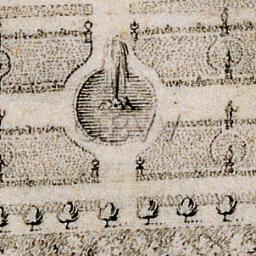

In [1]:
from PIL import Image

requested_image = Image.open("responses/exr2/my_requested_image.jpg")

display(requested_image)

### 3c (optional) Open Images with Web Browser

- [ ] If you are running this notebook in your local environment, you can open the image on your default web browser by using the native python library "webbrowser". Try to execute following code.

In [2]:
import webbrowser

webbrowser.open_new("responses/exr2/my_requested_image.jpg")

True

## Step 4) What about JSON / XML / HTML based files?

- [ ] Let's find another web service that offers JSON or GML based data files and follow similar instructions to save this data on our local machine or python environment. Visit following web page:
    - [Basic geospatial data of the official surveying system in North Rhine-Westphalia](https://www.ldproxy.nrw.de/kataster) (Geobasisdaten des amtlichen Vermessungswesens in Nordrhein-Westfalen
)
- [ ] Select one of the "collection"s (Landparcel/Flurstück, Building/Gebaeude or Administrative Unit/Verwaltungseinheit). 
- [ ] Select one of the features in the list and click on the JSON link at top right side of the page. If the data looks like too complex, try finding and installing a JSON viewer/parser add-on/extension for your browser.
    - TIP: It is recommended to search for "JSON Lite" in Firefox, "JSON-Handle" or "JSON Viewer Pro" in Chrome browser.
- [ ] Check also the GML file on the same page (Top-right). You can also find some useful add-ons/extensions to visualize XML based files in a "more human-readable way", often called  "pretty-print" style.
    - TIP: It is recommended to search for "Pretty XML" in Firefox, "XML Plus" in Chrome browser.
    - TIP: If the browser cannot open the GML/XML file in a new tab, then you can save the file on your local machine and open it by using web browser ( Right Click --> Open with ).
    
Here you will see different visualizations of JSON or XML files within these extensions:

![JSON or XML Visualizations](images/exr2/browser_addons.png)

## Step 5) How to request JSON / XML / HTML based files from the web services?

- [ ] Remove the last two lines from your code block or convert them into comment by adding hashtag (#) to the beginning of lines. (Keyboard Shortcut: Ctrl + / )
- [ ] Copy and paste the requested URL in previous step (4) into your code block.
- [ ] Add the lines ```myjson = mydata.json()``` and ```print(myjson)``` just after the requested URL.

In [17]:
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

myjson = mydata.json()

#print(myjson)

|  |  |  |
|---|---|---|
| **Variable Name** | mydata | mydata.json()
| **Variable Type** | requests.models.Response | dict(Python Dictionary)

### 5a) Inspect the response

Here you have As you may notice, it was not actually converted into a JSON object, but is now a "**JSON serializable Python object**". In general terms it has been converted into a "**python dictionary**" object. JSON stands for Java Script Object Notation and is designed to provide a more developer-friendly alternative to XML. If you would select a most python-native encoding format, that would be none of these, but YAML. However, YAML format is out of our focus for this exercise. That is, it is a natural data exchange format designed for JavaScript, but not for Python. Python uses predefined data types such as tuples, lists and the most JSON-like format "dictionary" to handle the same data internally. The given code part has converted the response object to a JSON by using a method of requests.get, but ...

- [ ] Is it really JSON?
    - Type ```type(myjson)```
- [ ] What are available methods or attributes for this instance object?
    - Type ```dir(myjson)```
- [ ] How can we use these available methods with this instance?
    - Type ```help(myjson)```
    - or get the help document for a specific method (e.g. ```help(myjson.items)```)

TIP: If you would select a most python-native encoding format, that would be none of these, but **YAML**. Since, the YAML format is out of our focus for this exercise, we didn't mention about that yet.

- [ ] If you try to save the python dictionary object to a file, you will notice an error.
```with open("responses/exr2/my_request.json", "w") as my_json_request:```

```        my_json_request.write(myjson)```

- [ ] However, you can change the "json()" method with "text" method and save the file as received like in the example below.
    - [ ] Alternatively, you can cast (convert the data type) the dictionary type to a string using the built-in function **str()**.


In [20]:
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

# Alternative method:
# text_file = str(mydata)
text_file = mydata.text


with open("responses/exr2/my_request.json", "w") as my_req:
         my_req.write(text_file)

#print(text_file)

|  |  |  |
|---|---| --- |
| **Variable Name** | mydata | mydata.text
| **Variable Type** | requests.models.Response | str (String)

### 5b) Convert Dictionary to Text using JSON library (dumps method)

When this method is applied, ‘text_file’ is assumed to be just a dumped json file and is saved with the file extension ‘.json’. So it is currently no different from a normal text file. By importing the ‘json’ library, we will get more functionality within our data, such as filtering, sorting, re-indenting, etc.

- [ ] To do this, you need to import the native library called "json". Add the line at the beginning of code block: ```import json```

- [ ] Then use ```json.dumps``` to convert the dictionary to a string. 

In [30]:
import json
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

myjson = mydata.json()

json_file = json.dumps(myjson)

type(json_file)

str

|  |  |  |  |
|---|---|---|---|
| **Variable Name** | mydata | mydata.json() | json_file
| **Variable Type** | requests.models.Response | dict | str

### 5c) Convert Text to Dictionary using JSON library (loads method)

What if you had a text file instead of a python dictionary? Can you convert a text file to a JSON file?
- [ ] If the response text is in regular JSON format, you can convert it to a dictionary using the **loads** method of the json library (see below).
- If not, the json parser will throw an error and you may need to use additional string functions such as rstrip, lstrip, replace to fix the problem in the text. You can also browse [this web page](https://www.w3schools.com/python/python_ref_string.asp) for python string methods.

In [31]:
import json
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

myjson = mydata.text

my_object = json.loads(myjson)

type(my_object)

#print(my_object.get('links'))

dict

|  |  |  |  |
|---|---|---|---|
| **Variable Name** | mydata | myjson | my_object
| **Variable Type** | requests.models.Response | str | dict

### 5d) Save the JSON file

- [ ] Now, you can copy the JSON file to our local machine by using "with" statement.

In [20]:
import json
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

myjson = mydata.json()

json_file = json.dumps(myjson)

with open("responses/exr2/my_request.json", "w") as my_json_req:
        my_json_req.write(json_file)

#print(json_file)

### 5e) Use one of the parameters of dumps method (e.g. Indentation)

- [ ] Try using some of the available parameters of "json.dumps" method. (for exp. "indent")
    - To see all available parameters for the dumps method, type ```help(json.dumps)```.

In [33]:
import json
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

myjson = mydata.json()

json_file = json.dumps(myjson, indent=4)

with open("responses/exr2/my_request.json", "w") as my_json_req:
        my_json_req.write(json_file)

#print(json_file)

### 5f) Get a subset of the dictionary using JSON library (\_\_getitem\_\_ / [ ] )

- [ ] Python dictionaries can be filtered by defining keys. ('geometry' in the sample below)
    - Note that ```myjson['geometry']``` and ```myjson.__getitem__('geometry')``` will produce the same results.
    - The reason is square brakets [] are the shortcuts to the \_\_getitem\_\_ method and such shortcut mechanisms are called "magic methods" in Python. See [this web page](https://devopedia.org/magic-methods-in-python) see more examples for the magic methods.
    - You can type ```help(myjson.__getitem__)``` to expose the usage of the magic method.

In [43]:
import json
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

myjson = mydata.json()

# Alternative method: 
# my_geometry = myjson.__getitem__('geometry')
my_geometry = myjson['geometry']

json_file = json.dumps(my_geometry, indent=4)

with open("responses/exr2/my_request.json", "w") as my_json_req:
        my_json_req.write(json_file)

#print(json_file)

### 5g) Saving the response as it is in binary format

- [ ] Another possibility to save the desired JSON file is to export it by reading the data in binary format using the "w" to "b" parameter in the open function. Note that you don't need to import the "json" library as there is nothing to do with the object.

In [57]:
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

my_content = mydata.content

with open("responses/exr2/my_request.json", "wb") as my_json_req:
        my_json_req.write(my_content)

type(my_content)
#print(my_content.hex())

bytes

|  |  |  |
|---|---|---|
| **Variable Name** | mydata | mydata.content
| **Variable Type** | requests.models.Response | bytes

## Step 6) Read a JSON file and display in python interpreter

- [ ] You can read and modify saved files by using the "load" or "loads" method of the "json" library. To do this, you need to use "open" function with the "r" mode, which stands for "read".

In [86]:
import json
import requests

with open("my_request.json", "r") as my_json_req:
        json_file = my_json_req.read()

my_object = json.loads(json_file)

my_subset = my_object['geometry']

#print(my_subset)

|  |  |  |  |  |
|---|---|---|---|---|
| **Variable Name** | mydata | my_object | my_subset
| **Variable Type** | requests.models.Response | dict | dict

- TIP: If you are confused with the dump and load methods, take a look at the image below which explains how to convert json data into python dictionaries or vice a versa.
![json load and dump methods](images/exr2/json_load_dump.png)

## Step 7) Convert the JSON request into a program that saves only properties to a file

Suppose we want to save only the attributes of a desired JSON to a text file without all other attributes.

We can do this easily with loop conditions.

- [ ] Dictionaries, lists, tuples and sets are iterable data types in Python. So we don't need to do more, because the "myjson" variable is already a python dictionary. Let's change the filtering key with "properties".

In [106]:
import json
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

myjson = mydata.json()

mysubset = myjson['properties']

type(mysubset)

dict

- [ ] Since our data is still in the form of a dictionary, we can easily iterate the "key-value" pairs in a "for" condition like the one below:

In [66]:
import json
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

myjson = mydata.json()

mysubset = myjson['properties']

for prop in mysubset:
    print(prop)

aktualit
gebnutzbez
funktion


- [ ] Now you can use the "for" condition inside the "open" function to save the properties as a list with automatically generated line numbers.
- TIP: ```i=0``` and ```i=i+1``` automatically produces an integer and is casted as string to combine (concatenate) with other strings. Type casting is possible in python with built-in functions such as str(), int(), float(), bool(). 

In [102]:
import json
import requests

# Replace the URL with your own URL
mydata = requests.get("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

myjson = mydata.json()

mysubset = myjson['properties']

with open("responses/exr2/my_request.txt", "w") as my_req:
        i=0
        for prop in mysubset:
            i=i+1
            myformat = str(i) + ' : ' + prop + '\n' 
            my_req.write(myformat)            

## Step 8) Convert your code block into a function and let users define their own URL requests

- [ ] You have already entered the URL you want in the code by manually changing the URL part. Now let's make the program more interactive to allow users to define their own URL on each different request. You need to define a function that listens for a user parameter and uses the same parameter in the computations. To do this, you need to use **"def"** which stands for "definition". Move the lines used to transform the data into the function definition using indentation.

- TIP: In Python programming, you can define multiple variables with the same name. Any variable defined inside a function will only be within the scope of that function. That is, if you declare a variable inside a function, it can only be accessed inside the function. This behavior is called "local scope" (see the "mysubset" variable in the code block below).
- TIP: Defining a function is not enough to run it. If they are defined, you must call the function with mandatory parameters ("custom_url" in the example below.)

In [67]:
import json
import requests

def get_building_properties(custom_url):
    mydata = requests.get(custom_url)
    myjson = mydata.json()
    mysubset = myjson['properties']
    return mysubset

mysubset = get_building_properties("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

with open("responses/exr2/my_request.txt", "w") as my_req:
        i=0
        for prop in mysubset:
            i=i+1
            myformat = str(i) + ' : ' + prop + '\n' 
            my_req.write(myformat)
#print (mysubset)

|  |  |  |  |  |  |  |
|---|---|---|---|---|---|---|
| **Variable Name** | mydata | myjson | mysubset (local) | mysubset (global) | my_req
| **Variable Type** | requests.models.Response | dict | dict | dict | _io.TextIOWrapper

### 8a) Seperate the listing mechanism as a function

- [ ] We can also turn the code block that saves the file into a function, so that users can more easily determine the file name.
    - Note that the first parameter (my_object) of the save_property_as_list function is **required**.
    - Second parameter (my_file_name) is **optional**, which means that the function will use the default value if it is not defined.

In [70]:
import json
import requests

def get_building_properties(custom_url):
    mydata = requests.get(custom_url)
    myjson = mydata.json()
    mysubset = myjson['properties']
    return mysubset

def save_property_as_list(my_object, file_name='request.txt'):
    my_file_name = 'responses/exr2/' + file_name
    with open(my_file_name, "w") as my_req:
        i=0
        for prop in my_object:
            i=i+1
            myformat = str(i) + ' : ' + prop + '\n' 
            my_req.write(myformat)

building_properties = get_building_properties("https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json")

save_property_as_list(building_properties, "my_request.txt")

### 8b) Let the users interact with your program (input function)

- [ ] You can apply the "input" function to turn the code into an interactive program.

In [76]:
import json
import requests

def get_building_properties(custom_url):
    mydata = requests.get(custom_url)
    myjson = mydata.json()
    mysubset = myjson['properties']
    return mysubset

def save_property_as_list(my_object, file_name='request.txt'):
    # We implement an if-elif-else condition to consider empty input.
    if file_name == '':
        my_file_name = 'responses/exr2/' + 'request.txt'
    elif file_name == '-':
        my_file_name = 'responses/exr2/' + 'request.txt'
    else:
        my_file_name = 'responses/exr2/' + file_name
    
    with open(my_file_name, "w") as my_req:
        i=0
        for prop in my_object:
            i=i+1
            myformat = str(i) + ' : ' + prop + '\n' 
            my_req.write(myformat)
        print("List saved as a file :", my_file_name)
        # print(my_object)

requested_url = input("Enter the requested URL serves JSON : ")
building_properties = get_building_properties(requested_url)

custom_file_name = str(input("Specify a file name with extension : "))
save_property_as_list(building_properties, custom_file_name)

# Sample Inputs:
# https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json
# my_request2.txt

Enter the requested URL serves JSON :  https://www.ldproxy.nrw.de/kataster/collections/gebaeudebauwerk/items/DENW42AL1000NmHjBL?f=json
Specify a file name with extension :  -


List saved as a file : responses/exr2/request.txt
